In [7]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

In [8]:
df = pd.read_csv('imdb_top_1000.csv', index_col='Series_Title')
df = df.dropna(subset=['Gross'])
df['Gross'] = df['Gross'].apply(lambda x: int(x.replace(",", "")))

In [11]:
df

Poster_Link  \
Series_Title                                                                  
The Shawshank Redemption  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
The Godfather             https://m.media-amazon.com/images/M/MV5BM2MyNj...   
The Dark Knight           https://m.media-amazon.com/images/M/MV5BMTMxNT...   
The Godfather: Part II    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
12 Angry Men              https://m.media-amazon.com/images/M/MV5BMWU4N2...   
...                                                                     ...   
Giù la testa              https://m.media-amazon.com/images/M/MV5BYjRmY2...   
Kelly's Heroes            https://m.media-amazon.com/images/M/MV5BMzAyND...   
The Jungle Book           https://m.media-amazon.com/images/M/MV5BMjAwMT...   
A Hard Day's Night        https://m.media-amazon.com/images/M/MV5BZjQyMG...   
From Here to Eternity     https://m.media-amazon.com/images/M/MV5BM2U3Yz...   

                         Released_Year Certificate  Runtime  \
Series_Title                                                  
The Shawshank Redemption          1994           A  142 min   
The Godfather                     1972           A  175 min   
The Dark Knight                   2008          UA  152 min   
The Godfather: Part II            1974           A  202 min   
12 Angry Men                      1957           U   96 min   
...                                ...         ...      ...   
Giù la testa                      1971          PG  157 min   
Kelly's Heroes                    1970          GP  144 min   
The Jungle Book                   1967           U   78 min   
A Hard Day's Night                1964           U   87 min   
From Here to Eternity             1953      Passed  118 min   

                                                 Genre  IMDB_Rating  \
Series_Title                                                          
The Shawshank Redemption                         Drama          9.3   
The Godfather                             Crime, Drama          9.2   
The Dark Knight                   Action, Crime, Drama          9.0   
The Godfather: Part II                    Crime, Drama          9.0   
12 Angry Men                              Crime, Drama          9.0   
...                                                ...          ...   
Giù la testa                       Drama, War, Western          7.6   
Kelly's Heroes                  Adventure, Comedy, War          7.6   
The Jungle Book           Animation, Adventure, Family          7.6   
A Hard Day's Night              Comedy, Music, Musical          7.6   
From Here to Eternity              Drama, Romance, War          7.6   

                                                                   Overview  \
Series_Title                                                                  
The Shawshank Redemption  Two imprisoned men bond over a number of years...   
The Godfather             An organized crime dynasty's aging patriarch t...   
The Dark Knight           When the menace known as the Joker wreaks havo...   
The Godfather: Part II    The early life and career of Vito Corleone in ...   
12 Angry Men              A jury holdout attempts to prevent a miscarria...   
...                                                                     ...   
Giù la testa              A low-life bandit and an I.R.A. explosives exp...   
Kelly's Heroes            A group of U.S. soldiers sneaks across enemy l...   
The Jungle Book           Bagheera the Panther and Baloo the Bear have a...   
A Hard Day's Night        Over two "typical" days in the life of The Bea...   
From Here to Eternity     In Hawaii in 1941, a private is cruelly punish...   

                          Meta_score              Director           Star1  \
Series_Title                                                                 
The Shawshank Redemption        80.0        Frank Darabont     Tim Robbins   
The Godfather                 

In [13]:
from scipy.sparse import lil_matrix
import scipy.spatial.distance
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
k = 3  # Number of clusters
features = ['IMDB_Rating', 'No_of_Votes', 'Gross']
kmeans = KMeans(n_clusters=k, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
df['cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [19]:
for cluster_num in sorted(df['cluster'].unique()):
    print(f"\n=== Cluster {cluster_num} ===")
    print(df[df['cluster'] == cluster_num][['IMDB_Rating', 'No_of_Votes', 'Gross']])


=== Cluster 0 ===
                                       IMDB_Rating  No_of_Votes      Gross
Series_Title                                                              
Spider-Man: Into the Spider-Verse              8.4       375110  190241310
Avengers: Endgame                              8.4       809955  858373000
Avengers: Infinity War                         8.4       834477  678815482
Coco                                           8.4       384171  209726015
1917                                           8.3       425844  159227644
...                                            ...          ...        ...
300                                            7.6       732876  210614939
Harry Potter and the Sorcerer's Stone          7.6       658185  317575550
Minority Report                                7.6       508417  132072926
Apollo 13                                      7.6       269197  173837933
Home Alone                                     7.6       488817  285761243

[108 

In [23]:
features = ['IMDB_Rating', 'No_of_Votes', 'Gross']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])


k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

knn_graph = kneighbors_graph(X_scaled, n_neighbors=5, include_self=False)
A = knn_graph.toarray()

G = nx.from_numpy_array(A)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pos = {i: X_pca[i] for i in range(len(X_pca))}

labels = {i: df.index[i] for i in range(len(df))}


#This is the massive picture i used for medium
#MUST COMMENT THIS NEXT PART OUT BECAUSE THE FILESIZE FOR THIS BECOMES 36MB AND TOO LARGE TO UPLOAD TO GITHUB IF NOT COMMENTED OUT

#plt.figure(figsize=(120, 90), dpi=300)  # Huge canvas for clarity
#nx.draw(
#    G,
#    pos,
#    node_color=df['cluster'],
#    node_size=300,          # Bigger nodes
#    cmap=plt.cm.Set1,
#    with_labels=False
#)
#nx.draw_networkx_labels(
#    G,
#    pos,
#    labels,
#    font_size=16            # Bigger font for labels
#)
#
#plt.title("K-Means Clusters with Node Labels (Movie Titles)", fontsize=24)
#plt.savefig("network_clusters_large.png", dpi=300, bbox_inches='tight')
#plt.show()

C:\Users\test\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


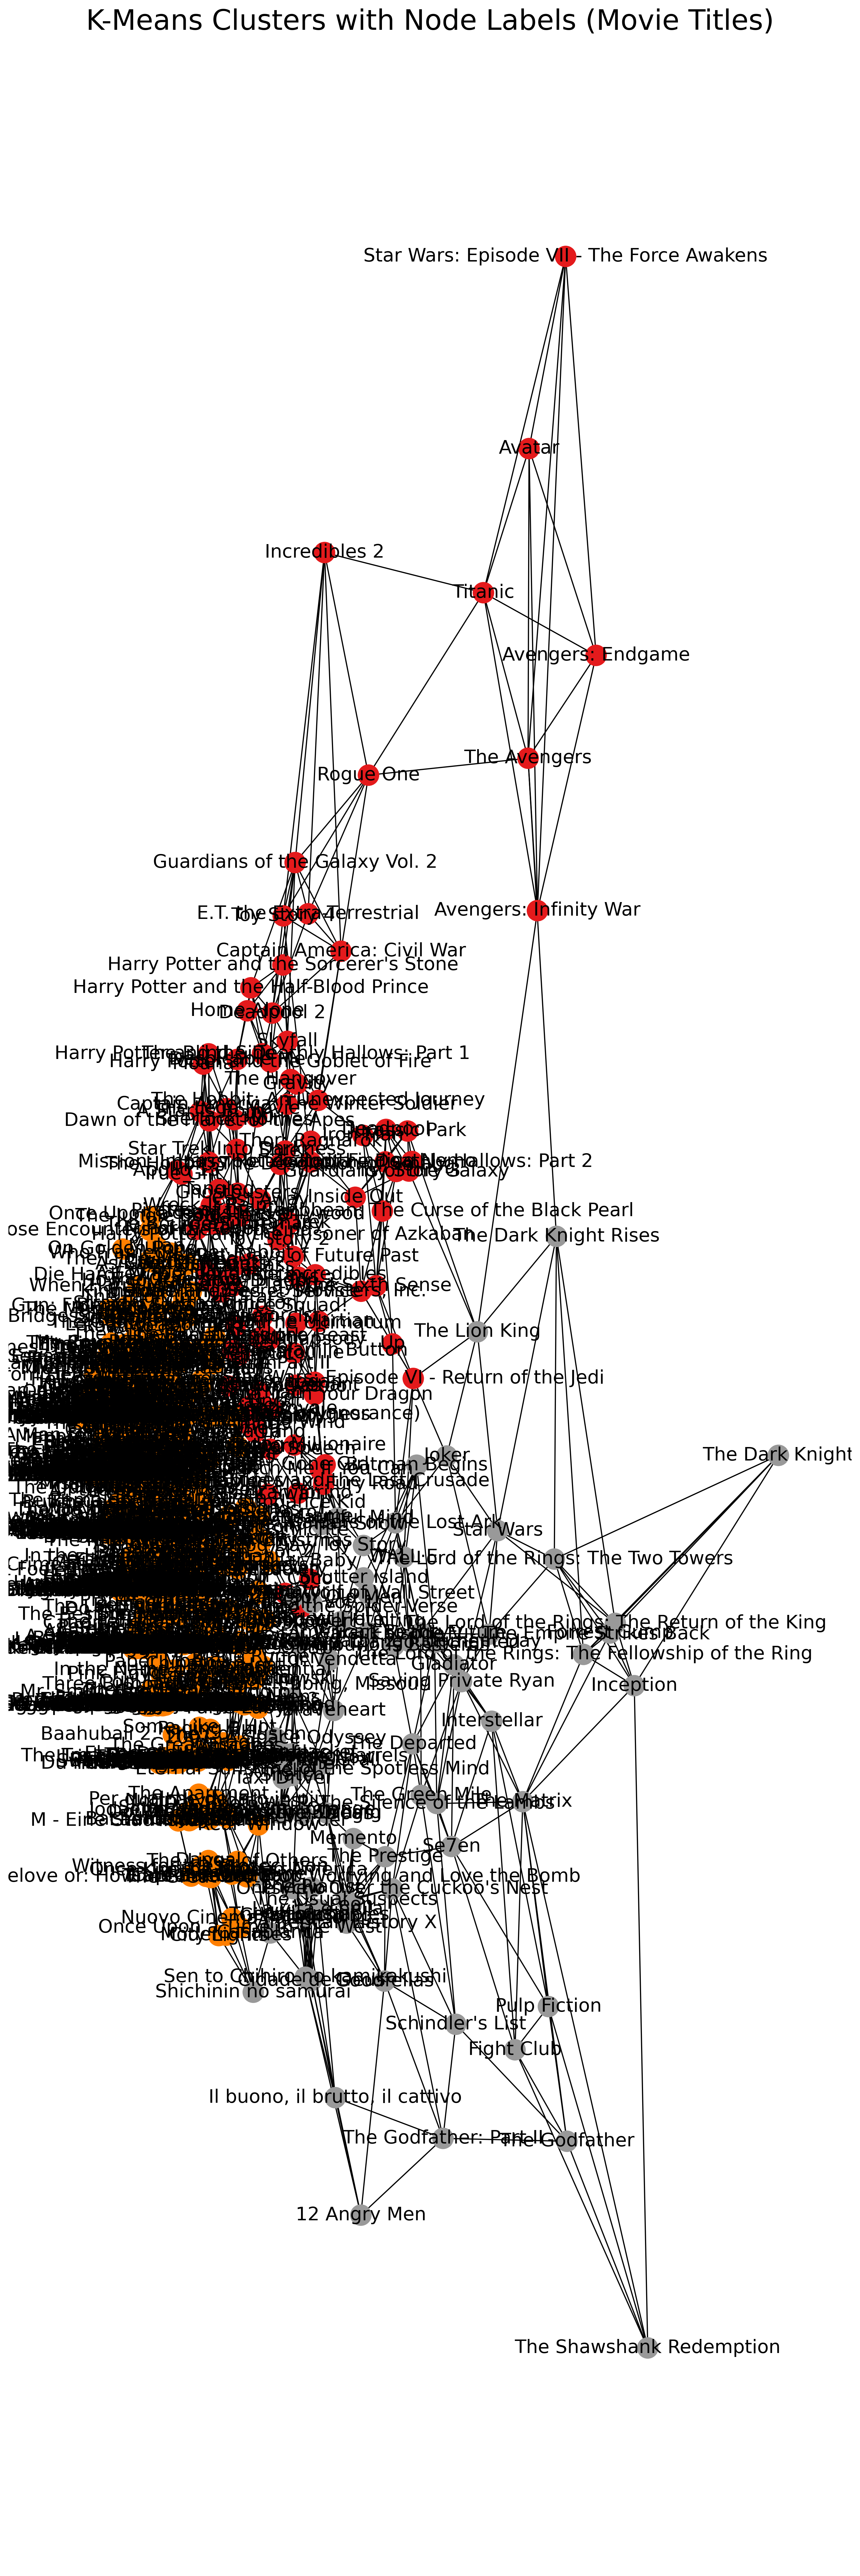

In [27]:
#this is the picture but small enough that i can upload this file to github. this is the network map but far less readable. the readable version was commented out in order to upload this file to github

plt.figure(figsize=(10, 30), dpi=300)  
nx.draw(
    G,
    pos,
    node_color=df['cluster'],
    node_size=300,          
    cmap=plt.cm.Set1,
    with_labels=False
)
nx.draw_networkx_labels(
    G,
    pos,
    labels,
    font_size=16            
)

plt.title("K-Means Clusters with Node Labels (Movie Titles)", fontsize=24)
plt.savefig("network_clusters_large.png", dpi=300, bbox_inches='tight')
plt.show()